## Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 

import seaborn as sns

## Load and review data

In [4]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
pdata.dtypes # Check number of columns and rows in data frame

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
pdata=pdata.drop(labels='ZIP Code',axis=1)
pdata=pdata.drop(labels='ID',axis=1)

In [7]:
pdata.head() # To check first 5 rows of data set

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
pdata.isnull().values.any() # If there are any null values in data set

False

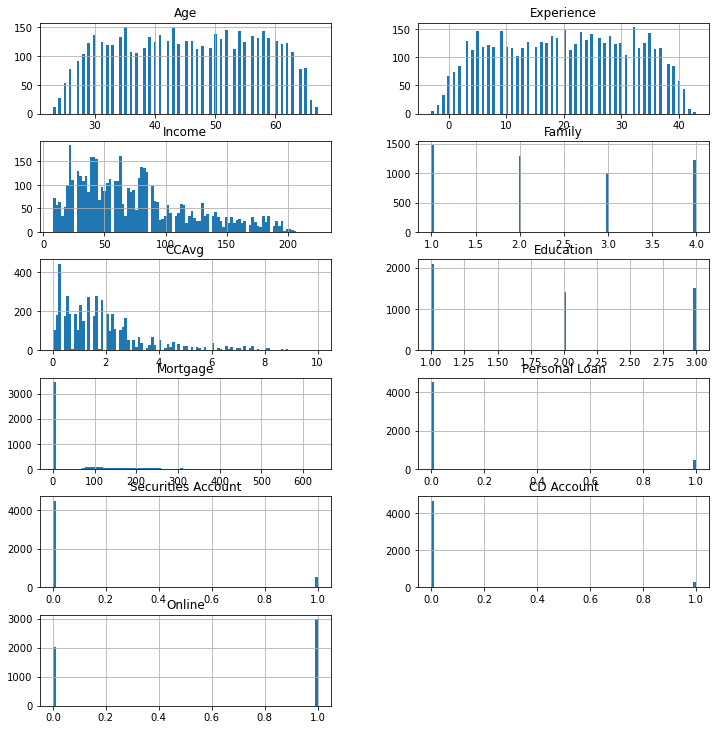

In [9]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

## Identify Correlation in data 

In [10]:
pdata.corr() # It will show correlation matrix 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [11]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

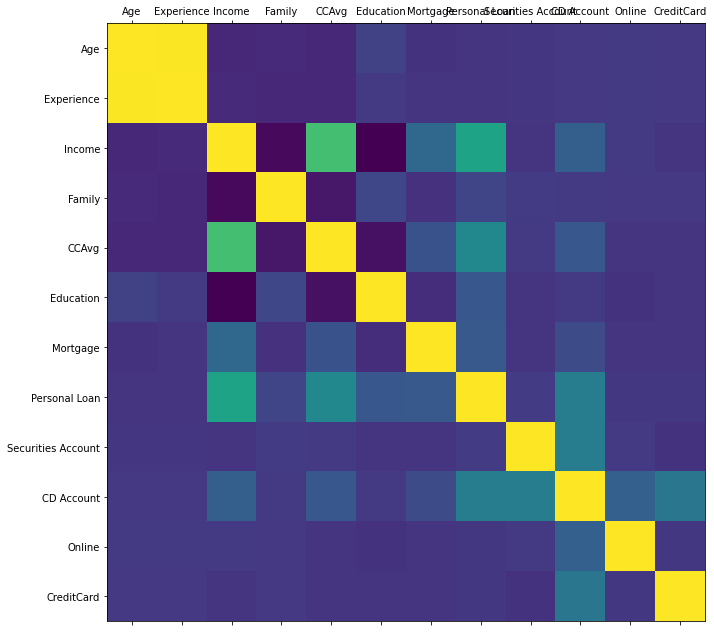

In [12]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

## Calculate diabetes ratio of True/False from outcome variable 

In [13]:
n_true = len(pdata.loc[pdata['Personal Loan'] == True])
n_false = len(pdata.loc[pdata['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes. 

Its a good distribution True/False cases of diabetes in data.

## Spliting the data 
I will use 70% of data for training and 30% for testing.

In [14]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)

Y = pdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


Lets check split of data

In [15]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check diabetes True/False ratio in split data 

In [16]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 480 (9.60%)
Original Diabetes False Values   : 4520 (90.40%)

Training Diabetes True Values    : 331 (9.46%)
Training Diabetes False Values   : 3169 (90.54%)

Test Diabetes True Values        : 149 (9.93%)
Test Diabetes False Values       : 1351 (90.07%)



# Data Preparation

### Check hidden missing values 

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [18]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


# Train Naive Bayes algorithm 

In [20]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
pl_model= GaussianNB()

pl_model.fit(x_train, y_train.ravel())

GaussianNB()

### Performance of our model with training data

In [25]:
pl_train_predict = pl_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, pl_train_predict)))
print()

Model Accuracy: 0.8900



### Performance of our model with testing data

In [22]:
pl_test_predict = pl_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, pl_test_predict)))
print()

Model Accuracy: 0.8747



### Lets check the confusion matrix and classification report 

Confusion Matrix
[[  84   65]
 [ 123 1228]]


<AxesSubplot:>

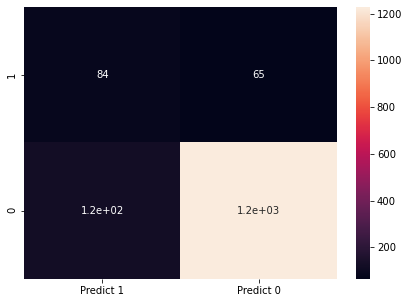

In [23]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pl_test_predict, labels=[1, 0])
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [24]:
print("Classification Report")
print(metrics.classification_report(y_test, pl_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



In [26]:
import pylab as pl
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)

In [27]:
classifier2 = GaussianNB()
probas1_ = classifier2.fit(x_train, y_train).predict_proba(x_test)
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)
print('Gini Coeffiecient=',2*(roc_auc1)-1)

Area under the ROC curve : 0.915181
Gini Coeffiecient= 0.8303618001082964


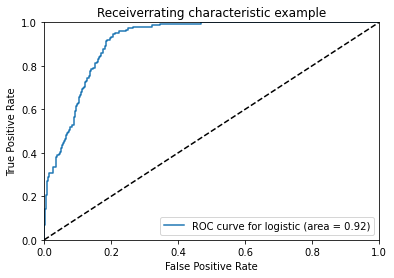

In [28]:
# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)

pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

         fpr1      tpr1    1-fpr1       tf1  thresholds1
144  0.162842  0.838926  0.837158  0.001769     0.025453


In [ ]:
roc1.head(71)

We can see our true positive numbers with value 1 is  of precision and recall is below 70% 